# Pandas 101, Lex Hider (PyCop)

![Wheee!](pics/pandas.gif)

# Outline

## Tutorial style walk through of 2 simple datasets using Pandas

### Dataset 1: BOM weather data.

### Dataset 2: Melbourne beer data. Finding your nearest craft beer of choice!

### Show, don't tell ;)

# Poll

## Who has used pandas before today??
## Who has used IPython Notebook??
## Who sort first talk from Arthur this morning?



# INSTALLATION

* Easiest not to install
* [Azure Notebooks](https://notebooks.azure.com), free hosted IPython Notebook webapp.

* Anaconda
    * Installs everything you need, including Python
    * Installs full SciPy stack, matplotlib, etc.
    * Cross-platform: Linux, OS X, Windows.

# Why Pandas?

* Python's answer to R

* Like an in-memory SQL/Excel on steroids.

* Plotting
* Groupby
* Fast, memory-efficient. (built on top of NumPy)!

In [5]:
# Convention
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example: Weather Data (BOM)

# **Step 1: Load Data**

### *Step 2: Clean data*

### *Step 3: Analyse Data*

# Brisbane BOM observation data:

[Melbourne BOM weather observations](http://www.bom.gov.au/products/IDV60901/IDV60901.95936.shtml)

# Reading Data in
* CSV
* SQL
* JSON
* Excel
* Google Analytics
* HDF5
* ...

In [6]:
csv_location = 'http://www.bom.gov.au/fwo/IDV60901/IDV60901.95936.axf'

    df = pd.read_csv(csv_location)
    
    ---------------------------------------------------------------------------
    CParserError                              Traceback (most recent call last)
    <ipython-input-287-204d553e31de> in <module>()
          1 csv_location = 'http://www.bom.gov.au/fwo/IDQ60901/IDQ60901.94576.axf'
    ----> 2 df = pd.read_csv(csv_filename)

    /Users/alexeihider/miniconda3/envs/py2_pycon/lib/python2.7/site-packages/pandas/io/parsers.pyc in parser_f(filepath_or_buffer, sep, dialect, compression, doublequote, escapechar, quotechar, quoting, skipinitialspace, lineterminator, header, index_col, names, prefix, skiprows, skipfooter, skip_footer, na_values, na_fvalues, true_values, false_values, delimiter, converters, dtype, usecols, engine, delim_whitespace, as_recarray, na_filter, compact_ints, use_unsigned, low_memory, buffer_lines, warn_bad_lines, error_bad_lines, keep_default_na, thousands, comment, decimal, parse_dates, keep_date_col, dayfirst, date_parser, memory_map, nrows, iterator, chunksize, verbose, encoding, squeeze, mangle_dupe_cols, tupleize_cols, infer_datetime_format)
        450                     infer_datetime_format=infer_datetime_format)
        451
    --> 452         return _read(filepath_or_buffer, kwds)
        453
        454     parser_f.__name__ = name

    /Users/alexeihider/miniconda3/envs/py2_pycon/lib/python2.7/site-packages/pandas/io/parsers.pyc in _read(filepath_or_buffer, kwds)
        242         return parser
        243
    --> 244     return parser.read()
        245
        246 _parser_defaults = {

    /Users/alexeihider/miniconda3/envs/py2_pycon/lib/python2.7/site-packages/pandas/io/parsers.pyc in read(self, nrows)
        693                 raise ValueError('skip_footer not supported for iteration')
        694
    --> 695         ret = self._engine.read(nrows)
        696
        697         if self.options.get('as_recarray'):

    /Users/alexeihider/miniconda3/envs/py2_pycon/lib/python2.7/site-packages/pandas/io/parsers.pyc in read(self, nrows)
       1137
       1138         try:
    -> 1139             data = self._reader.read(nrows)
       1140         except StopIteration:
       1141             if nrows is None:

    /Users/alexeihider/miniconda3/envs/py2_pycon/lib/python2.7/site-packages/pandas/parser.so in pandas.parser.TextReader.read (pandas/parser.c:7145)()

    /Users/alexeihider/miniconda3/envs/py2_pycon/lib/python2.7/site-packages/pandas/parser.so in pandas.parser.TextReader._read_low_memory (pandas/parser.c:7369)()

    /Users/alexeihider/miniconda3/envs/py2_pycon/lib/python2.7/site-packages/pandas/parser.so in pandas.parser.TextReader._read_rows (pandas/parser.c:7978)()

    /Users/alexeihider/miniconda3/envs/py2_pycon/lib/python2.7/site-packages/pandas/parser.so in pandas.parser.TextReader._tokenize_rows (pandas/parser.c:7852)()

    /Users/alexeihider/miniconda3/envs/py2_pycon/lib/python2.7/site-packages/pandas/parser.so in pandas.parser.raise_parser_error (pandas/parser.c:19591)()

    CParserError: Error tokenizing data. C error: Expected 2 fields in line 20, saw 35

In [7]:
fname = 'IDV60901.95936_2018-06-20T21.15.44.588516.axf'
with open(fname) as f:
    for i, line in enumerate(f):
        print(i, line[:70].rstrip())

0 [notice]
1 copyright[200]="Copyright Commonwealth of Australia 2018, Bureau of Me
2 copyright_url[80]="http://www.bom.gov.au/other/copyright.shtml"
3 disclaimer_url[80]="http://www.bom.gov.au/other/disclaimer.shtml"
4 feedback_url[80]="http://www.bom.gov.au/other/feedback"
5 [$]
6 
7 [header]
8 refresh_message[80]="Issued at  9:11 pm EST Wednesday 20 June 2018"
9 ID[80]="IDV60901"
10 main_ID[80]="IDV60900"
11 name[80]="Melbourne (Olympic Park)"
12 state_time_zone[80]="VIC"
13 time_zone[80]="EST"
14 product_name[80]="Capital City Observations"
15 state[80]="Victoria"
16 [$]
17 
18 [data]
19 sort_order,wmo,name[80],history_product[80],local_date_time[80],local_
20 0,95936,"Melbourne (Olympic Park)","IDV60901","20/09:00pm","2018062021
21 1,95936,"Melbourne (Olympic Park)","IDV60901","20/08:30pm","2018062020
22 2,95936,"Melbourne (Olympic Park)","IDV60901","20/08:00pm","2018062020
23 3,95936,"Melbourne (Olympic Park)","IDV60901","20/07:30pm","2018062019
24 4,95936,"Melbourne (Olympic Par

In [62]:
# This is a dataframe
# Its columns are Series
# It has an index & columns.
df = pd.read_csv(fname, skiprows=19)
df

,sort_order,wmo,name[80],history_product[80],local_date_time[80],local_date_time_full[80],aifstime_utc[80],lat,lon,apparent_t,...,rel_hum,sea_state[80],swell_dir_worded[80],swell_height,swell_period,vis_km[80],weather[80],wind_dir[80],wind_spd_kmh,wind_spd_kt
0,0,95936.0,Melbourne (Olympic Park),IDV60901,20/09:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,7.3,...,74.0,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0
1,1,95936.0,Melbourne (Olympic Park),IDV60901,20/08:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,7.5,...,70.0,-,-,-9999.0,-9999.0,10.0,-,N,11.0,6.0
2,2,95936.0,Melbourne (Olympic Park),IDV60901,20/08:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,8.7,...,67.0,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0
3,3,95936.0,Melbourne (Olympic Park),IDV60901,20/07:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,8.3,...,67.0,-,-,-9999.0,-9999.0,10.0,-,NNW,11.0,6.0
4,4,95936.0,Melbourne (Olympic Park),IDV60901,20/07:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,8.9,...,67.0,-,-,-9999.0,-9999.0,10.0,-,NNW,7.0,4.0
5,5,95936.0,Melbourne (Olympic Park),IDV60901,20/06:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.0,...,64.0,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0
6,6,95936.0,Melbourne (Olympic Park),IDV60901,20/06:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.3,...,62.0,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0
7,7,95936.0,Melbourne (Olympic Park),IDV60901,20/05:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.0,...,60.0,-,-,-9999.0,-9999.0,10.0,-,N,13.0,7.0
8,8,95936.0,Melbourne (Olympic Park),IDV60901,20/05:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.1,...,59.0,-,-,-9999.0,-9999.0,10.0,-,N,15.0,8.0
9,9,95936.0,Melbourne (Olympic Park),IDV60901,20/04:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.5,...,55.0,-,-,-9999.0,-9999.0,10.0,-,N,17.0,9.0


# DataFrame is like a Dictionary

## Series returned

In [9]:
# Can delete columns
del df['wmo']

print(df['air_temp'][3])

df['air_temp']

# A Series is an index and one column of values.
# A Dataframe is an index and one or more columns of values.

11.4


0      10.0
1      10.6
2      11.4
3      11.4
4      11.3
5      11.8
6      12.1
7      12.6
8      13.0
9      13.9
10     14.0
11     14.1
12     15.2
13     14.5
14     14.2
15     13.7
16     13.3
17     12.9
18     12.8
19     12.7
20     10.8
21      8.9
22      7.2
23      6.5
24      6.1
25      5.9
26      5.7
27      5.6
28      5.4
29      5.4
       ... 
115    11.5
116    11.6
117    10.7
118    11.6
119    11.9
120    11.5
121    11.0
122    10.5
123    10.5
124    10.7
125    10.7
126    11.2
127    11.2
128    11.4
129    11.4
130    11.3
131    11.1
132    11.3
133    11.1
134    11.1
135    11.0
136    11.5
137    11.6
138    11.7
139    11.0
140    11.5
141    10.8
142    12.1
143    12.2
144     NaN
Name: air_temp, dtype: float64

In [10]:
# Vectorized math is really fast and descriptive!

# If you ever writing a for loop, you may be doing it wrong.

# Celsius -> Fahrenheit.
df['air_temp_f'] = df['air_temp'] * 9 / 5 + 32
df[['air_temp', 'air_temp_f']]

,air_temp,air_temp_f
0,10.0,50.00
1,10.6,51.08
2,11.4,52.52
3,11.4,52.52
4,11.3,52.34
5,11.8,53.24
6,12.1,53.78
7,12.6,54.68
8,13.0,55.40
9,13.9,57.02


# If your task was to:
* grab dataset,
* convert to Fahrenheit,
* write to disk.

## That's 3 lines of code!
    df = pd.read_csv(csv_filename, skiprows=19)
    df['air_temp_f'] = df['air_temp'] * 9 / 5 + 32
    df.to_csv('data_w_fahrenheit.csv')
    
## if you're running this code, you probably should be using pandas ;)
    import csv

### ~~Step 1: Load Data~~

# **Step 2: Clean data**

### Step 3: Analyse Data

## Unwritten rule: 70% of data analysis is spent cleaning your data.

In [11]:
df
# What's with those weird names?

,sort_order,name[80],history_product[80],local_date_time[80],local_date_time_full[80],aifstime_utc[80],lat,lon,apparent_t,cloud[80],...,sea_state[80],swell_dir_worded[80],swell_height,swell_period,vis_km[80],weather[80],wind_dir[80],wind_spd_kmh,wind_spd_kt,air_temp_f
0,0,Melbourne (Olympic Park),IDV60901,20/09:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,7.3,-,...,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0,50.00
1,1,Melbourne (Olympic Park),IDV60901,20/08:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,7.5,-,...,-,-,-9999.0,-9999.0,10.0,-,N,11.0,6.0,51.08
2,2,Melbourne (Olympic Park),IDV60901,20/08:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,8.7,-,...,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0,52.52
3,3,Melbourne (Olympic Park),IDV60901,20/07:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,8.3,-,...,-,-,-9999.0,-9999.0,10.0,-,NNW,11.0,6.0,52.52
4,4,Melbourne (Olympic Park),IDV60901,20/07:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,8.9,-,...,-,-,-9999.0,-9999.0,10.0,-,NNW,7.0,4.0,52.34
5,5,Melbourne (Olympic Park),IDV60901,20/06:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.0,-,...,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0,53.24
6,6,Melbourne (Olympic Park),IDV60901,20/06:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.3,-,...,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0,53.78
7,7,Melbourne (Olympic Park),IDV60901,20/05:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.0,-,...,-,-,-9999.0,-9999.0,10.0,-,N,13.0,7.0,54.68
8,8,Melbourne (Olympic Park),IDV60901,20/05:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.1,-,...,-,-,-9999.0,-9999.0,10.0,-,N,15.0,8.0,55.40
9,9,Melbourne (Olympic Park),IDV60901,20/04:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.5,-,...,-,-,-9999.0,-9999.0,10.0,-,N,17.0,9.0,57.02


In [12]:
# rename method

df = df.rename(columns={'name[80]': 'name'})
df

,sort_order,name,history_product[80],local_date_time[80],local_date_time_full[80],aifstime_utc[80],lat,lon,apparent_t,cloud[80],...,sea_state[80],swell_dir_worded[80],swell_height,swell_period,vis_km[80],weather[80],wind_dir[80],wind_spd_kmh,wind_spd_kt,air_temp_f
0,0,Melbourne (Olympic Park),IDV60901,20/09:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,7.3,-,...,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0,50.00
1,1,Melbourne (Olympic Park),IDV60901,20/08:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,7.5,-,...,-,-,-9999.0,-9999.0,10.0,-,N,11.0,6.0,51.08
2,2,Melbourne (Olympic Park),IDV60901,20/08:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,8.7,-,...,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0,52.52
3,3,Melbourne (Olympic Park),IDV60901,20/07:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,8.3,-,...,-,-,-9999.0,-9999.0,10.0,-,NNW,11.0,6.0,52.52
4,4,Melbourne (Olympic Park),IDV60901,20/07:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,8.9,-,...,-,-,-9999.0,-9999.0,10.0,-,NNW,7.0,4.0,52.34
5,5,Melbourne (Olympic Park),IDV60901,20/06:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.0,-,...,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0,53.24
6,6,Melbourne (Olympic Park),IDV60901,20/06:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.3,-,...,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0,53.78
7,7,Melbourne (Olympic Park),IDV60901,20/05:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.0,-,...,-,-,-9999.0,-9999.0,10.0,-,N,13.0,7.0,54.68
8,8,Melbourne (Olympic Park),IDV60901,20/05:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.1,-,...,-,-,-9999.0,-9999.0,10.0,-,N,15.0,8.0,55.40
9,9,Melbourne (Olympic Park),IDV60901,20/04:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.5,-,...,-,-,-9999.0,-9999.0,10.0,-,N,17.0,9.0,57.02


In [13]:
# can pass rename method a function

def fix_column_names(col_name):
    return col_name.replace('[80]', '')

df = df.rename(columns=fix_column_names)

df

,sort_order,name,history_product,local_date_time,local_date_time_full,aifstime_utc,lat,lon,apparent_t,cloud,...,sea_state,swell_dir_worded,swell_height,swell_period,vis_km,weather,wind_dir,wind_spd_kmh,wind_spd_kt,air_temp_f
0,0,Melbourne (Olympic Park),IDV60901,20/09:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,7.3,-,...,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0,50.00
1,1,Melbourne (Olympic Park),IDV60901,20/08:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,7.5,-,...,-,-,-9999.0,-9999.0,10.0,-,N,11.0,6.0,51.08
2,2,Melbourne (Olympic Park),IDV60901,20/08:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,8.7,-,...,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0,52.52
3,3,Melbourne (Olympic Park),IDV60901,20/07:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,8.3,-,...,-,-,-9999.0,-9999.0,10.0,-,NNW,11.0,6.0,52.52
4,4,Melbourne (Olympic Park),IDV60901,20/07:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,8.9,-,...,-,-,-9999.0,-9999.0,10.0,-,NNW,7.0,4.0,52.34
5,5,Melbourne (Olympic Park),IDV60901,20/06:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.0,-,...,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0,53.24
6,6,Melbourne (Olympic Park),IDV60901,20/06:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.3,-,...,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0,53.78
7,7,Melbourne (Olympic Park),IDV60901,20/05:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.0,-,...,-,-,-9999.0,-9999.0,10.0,-,N,13.0,7.0,54.68
8,8,Melbourne (Olympic Park),IDV60901,20/05:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.1,-,...,-,-,-9999.0,-9999.0,10.0,-,N,15.0,8.0,55.40
9,9,Melbourne (Olympic Park),IDV60901,20/04:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.5,-,...,-,-,-9999.0,-9999.0,10.0,-,N,17.0,9.0,57.02


In [14]:
# Can also be treated like a list!!

print(df.iloc[0]['name'])

# This is the 1st row
df.iloc[0]

Melbourne (Olympic Park)


sort_order                                     0
name                    Melbourne (Olympic Park)
history_product                         IDV60901
local_date_time                       20/09:00pm
local_date_time_full                 2.01806e+13
aifstime_utc                         2.01806e+13
lat                                        -37.8
lon                                          145
apparent_t                                   7.3
cloud                                          -
cloud_base_m                               -9999
cloud_oktas                                -9999
cloud_type_id                              -9999
cloud_type                                     -
delta_t                                        2
gust_kmh                                      19
gust_kt                                       10
air_temp                                      10
dewpt                                        5.6
press                                     1027.9
press_qnh           

In [15]:
# This is the last row
df.iloc[-1]

sort_order              [$]
name                    NaN
history_product         NaN
local_date_time         NaN
local_date_time_full    NaN
aifstime_utc            NaN
lat                     NaN
lon                     NaN
apparent_t              NaN
cloud                   NaN
cloud_base_m            NaN
cloud_oktas             NaN
cloud_type_id           NaN
cloud_type              NaN
delta_t                 NaN
gust_kmh                NaN
gust_kt                 NaN
air_temp                NaN
dewpt                   NaN
press                   NaN
press_qnh               NaN
press_msl               NaN
press_tend              NaN
rain_trace              NaN
rel_hum                 NaN
sea_state               NaN
swell_dir_worded        NaN
swell_height            NaN
swell_period            NaN
vis_km                  NaN
weather                 NaN
wind_dir                NaN
wind_spd_kmh            NaN
wind_spd_kt             NaN
air_temp_f              NaN
Name: 144, dtype: ob

In [16]:
# You can slice too!

df.iloc[-4:]

,sort_order,name,history_product,local_date_time,local_date_time_full,aifstime_utc,lat,lon,apparent_t,cloud,...,sea_state,swell_dir_worded,swell_height,swell_period,vis_km,weather,wind_dir,wind_spd_kmh,wind_spd_kt,air_temp_f
141,141,Melbourne (Olympic Park),IDV60901,17/10:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,7.3,-,...,-,-,-9999.0,-9999.0,10.0,-,S,17.0,9.0,51.44
142,142,Melbourne (Olympic Park),IDV60901,17/10:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.4,-,...,-,-,-9999.0,-9999.0,10.0,-,S,13.0,7.0,53.78
143,143,Melbourne (Olympic Park),IDV60901,17/09:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.5,-,...,-,-,-9999.0,-9999.0,10.0,-,S,13.0,7.0,53.96
144,[$],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# NaN similar to NULL in SQL.

* .isnull()
* .notnull()
* .fillna()  # e.g. df.fillna(0)

In [17]:
# option 1
df.iloc[:-2]

# option 2
df.dropna()

,sort_order,name,history_product,local_date_time,local_date_time_full,aifstime_utc,lat,lon,apparent_t,cloud,...,sea_state,swell_dir_worded,swell_height,swell_period,vis_km,weather,wind_dir,wind_spd_kmh,wind_spd_kt,air_temp_f
0,0,Melbourne (Olympic Park),IDV60901,20/09:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,7.3,-,...,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0,50.00
1,1,Melbourne (Olympic Park),IDV60901,20/08:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,7.5,-,...,-,-,-9999.0,-9999.0,10.0,-,N,11.0,6.0,51.08
2,2,Melbourne (Olympic Park),IDV60901,20/08:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,8.7,-,...,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0,52.52
3,3,Melbourne (Olympic Park),IDV60901,20/07:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,8.3,-,...,-,-,-9999.0,-9999.0,10.0,-,NNW,11.0,6.0,52.52
4,4,Melbourne (Olympic Park),IDV60901,20/07:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,8.9,-,...,-,-,-9999.0,-9999.0,10.0,-,NNW,7.0,4.0,52.34
5,5,Melbourne (Olympic Park),IDV60901,20/06:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.0,-,...,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0,53.24
6,6,Melbourne (Olympic Park),IDV60901,20/06:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.3,-,...,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0,53.78
7,7,Melbourne (Olympic Park),IDV60901,20/05:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.0,-,...,-,-,-9999.0,-9999.0,10.0,-,N,13.0,7.0,54.68
8,8,Melbourne (Olympic Park),IDV60901,20/05:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.1,-,...,-,-,-9999.0,-9999.0,10.0,-,N,15.0,8.0,55.40
9,9,Melbourne (Olympic Park),IDV60901,20/04:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.5,-,...,-,-,-9999.0,-9999.0,10.0,-,N,17.0,9.0,57.02


In [18]:
# This will be a Series of True, False values.
df['name'].notnull()

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
115     True
116     True
117     True
118     True
119     True
120     True
121     True
122     True
123     True
124     True
125     True
126     True
127     True
128     True
129     True
130     True
131     True
132     True
133     True
134     True
135     True
136     True
137     True
138     True
139     True
140     True
141     True
142     True
143     True
144    False
Name: name, dtype: bool

In [19]:
name_is_not_null = df['name'].notnull()
df = df[name_is_not_null]

# Or in one-line
df = df[df['name'].notnull()]

# Boolean indexing.
# Only returns rows where True is passed in.
df.iloc[-3:]

,sort_order,name,history_product,local_date_time,local_date_time_full,aifstime_utc,lat,lon,apparent_t,cloud,...,sea_state,swell_dir_worded,swell_height,swell_period,vis_km,weather,wind_dir,wind_spd_kmh,wind_spd_kt,air_temp_f
141,141,Melbourne (Olympic Park),IDV60901,17/10:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,7.3,-,...,-,-,-9999.0,-9999.0,10.0,-,S,17.0,9.0,51.44
142,142,Melbourne (Olympic Park),IDV60901,17/10:00pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.4,-,...,-,-,-9999.0,-9999.0,10.0,-,S,13.0,7.0,53.78
143,143,Melbourne (Olympic Park),IDV60901,17/09:30pm,2.018062e+13,2.018062e+13,-37.8,145.0,9.5,-,...,-,-,-9999.0,-9999.0,10.0,-,S,13.0,7.0,53.96


In [20]:
# That's a weird looking date.
df['local_date_time_full']

0      2.018062e+13
1      2.018062e+13
2      2.018062e+13
3      2.018062e+13
4      2.018062e+13
5      2.018062e+13
6      2.018062e+13
7      2.018062e+13
8      2.018062e+13
9      2.018062e+13
10     2.018062e+13
11     2.018062e+13
12     2.018062e+13
13     2.018062e+13
14     2.018062e+13
15     2.018062e+13
16     2.018062e+13
17     2.018062e+13
18     2.018062e+13
19     2.018062e+13
20     2.018062e+13
21     2.018062e+13
22     2.018062e+13
23     2.018062e+13
24     2.018062e+13
25     2.018062e+13
26     2.018062e+13
27     2.018062e+13
28     2.018062e+13
29     2.018062e+13
           ...     
114    2.018062e+13
115    2.018062e+13
116    2.018062e+13
117    2.018062e+13
118    2.018062e+13
119    2.018062e+13
120    2.018062e+13
121    2.018062e+13
122    2.018062e+13
123    2.018062e+13
124    2.018062e+13
125    2.018062e+13
126    2.018062e+13
127    2.018062e+13
128    2.018062e+13
129    2.018062e+13
130    2.018062e+13
131    2.018062e+13
132    2.018062e+13


In [21]:
# each dataframe column has a homogenous type (dtype)
df.dtypes

sort_order               object
name                     object
history_product          object
local_date_time          object
local_date_time_full    float64
aifstime_utc            float64
lat                     float64
lon                     float64
apparent_t              float64
cloud                    object
cloud_base_m            float64
cloud_oktas             float64
cloud_type_id           float64
cloud_type               object
delta_t                 float64
gust_kmh                float64
gust_kt                 float64
air_temp                float64
dewpt                   float64
press                   float64
press_qnh               float64
press_msl               float64
press_tend               object
rain_trace              float64
rel_hum                 float64
sea_state                object
swell_dir_worded         object
swell_height            float64
swell_period            float64
vis_km                  float64
weather                  object
wind_dir

In [22]:
# map, will run function on each element.

def from_float_to_string(f):
    return str(int(f))
df['local_date_time_full'].map(from_float_to_string)

0      20180620210000
1      20180620203000
2      20180620200000
3      20180620193000
4      20180620190000
5      20180620183000
6      20180620180000
7      20180620173000
8      20180620170000
9      20180620163000
10     20180620160000
11     20180620153000
12     20180620150000
13     20180620143000
14     20180620140000
15     20180620133000
16     20180620130000
17     20180620123000
18     20180620120000
19     20180620113000
20     20180620110000
21     20180620103000
22     20180620100000
23     20180620093000
24     20180620090000
25     20180620083000
26     20180620080000
27     20180620073000
28     20180620070000
29     20180620063000
            ...      
114    20180618120000
115    20180618113000
116    20180618110000
117    20180618103000
118    20180618100000
119    20180618093000
120    20180618090000
121    20180618083000
122    20180618080000
123    20180618073000
124    20180618070000
125    20180618063000
126    20180618060000
127    20180618053000
128    201

In [23]:
# pd.to_datetime, can parse any date-like strings you throw at it!

# e.g.
# 1/1/2014
# 01 Jan, 2014
# 20140101
# etc, etc

dates_as_strings = df['local_date_time_full'].map(from_float_to_string)
df['local_date_time_full'] = pd.to_datetime(dates_as_strings)
df['local_date_time_full']

# datetime64[ns], nanosecond resolution, stored as an int!

0     2018-06-20 21:00:00
1     2018-06-20 20:30:00
2     2018-06-20 20:00:00
3     2018-06-20 19:30:00
4     2018-06-20 19:00:00
5     2018-06-20 18:30:00
6     2018-06-20 18:00:00
7     2018-06-20 17:30:00
8     2018-06-20 17:00:00
9     2018-06-20 16:30:00
10    2018-06-20 16:00:00
11    2018-06-20 15:30:00
12    2018-06-20 15:00:00
13    2018-06-20 14:30:00
14    2018-06-20 14:00:00
15    2018-06-20 13:30:00
16    2018-06-20 13:00:00
17    2018-06-20 12:30:00
18    2018-06-20 12:00:00
19    2018-06-20 11:30:00
20    2018-06-20 11:00:00
21    2018-06-20 10:30:00
22    2018-06-20 10:00:00
23    2018-06-20 09:30:00
24    2018-06-20 09:00:00
25    2018-06-20 08:30:00
26    2018-06-20 08:00:00
27    2018-06-20 07:30:00
28    2018-06-20 07:00:00
29    2018-06-20 06:30:00
              ...        
114   2018-06-18 12:00:00
115   2018-06-18 11:30:00
116   2018-06-18 11:00:00
117   2018-06-18 10:30:00
118   2018-06-18 10:00:00
119   2018-06-18 09:30:00
120   2018-06-18 09:00:00
121   2018-0

In [24]:
# default index, 0, 1.
# Like SQL auto-increment. index = range(len(df))
df

,sort_order,name,history_product,local_date_time,local_date_time_full,aifstime_utc,lat,lon,apparent_t,cloud,...,sea_state,swell_dir_worded,swell_height,swell_period,vis_km,weather,wind_dir,wind_spd_kmh,wind_spd_kt,air_temp_f
0,0,Melbourne (Olympic Park),IDV60901,20/09:00pm,2018-06-20 21:00:00,2.018062e+13,-37.8,145.0,7.3,-,...,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0,50.00
1,1,Melbourne (Olympic Park),IDV60901,20/08:30pm,2018-06-20 20:30:00,2.018062e+13,-37.8,145.0,7.5,-,...,-,-,-9999.0,-9999.0,10.0,-,N,11.0,6.0,51.08
2,2,Melbourne (Olympic Park),IDV60901,20/08:00pm,2018-06-20 20:00:00,2.018062e+13,-37.8,145.0,8.7,-,...,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0,52.52
3,3,Melbourne (Olympic Park),IDV60901,20/07:30pm,2018-06-20 19:30:00,2.018062e+13,-37.8,145.0,8.3,-,...,-,-,-9999.0,-9999.0,10.0,-,NNW,11.0,6.0,52.52
4,4,Melbourne (Olympic Park),IDV60901,20/07:00pm,2018-06-20 19:00:00,2.018062e+13,-37.8,145.0,8.9,-,...,-,-,-9999.0,-9999.0,10.0,-,NNW,7.0,4.0,52.34
5,5,Melbourne (Olympic Park),IDV60901,20/06:30pm,2018-06-20 18:30:00,2.018062e+13,-37.8,145.0,9.0,-,...,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0,53.24
6,6,Melbourne (Olympic Park),IDV60901,20/06:00pm,2018-06-20 18:00:00,2.018062e+13,-37.8,145.0,9.3,-,...,-,-,-9999.0,-9999.0,10.0,-,N,9.0,5.0,53.78
7,7,Melbourne (Olympic Park),IDV60901,20/05:30pm,2018-06-20 17:30:00,2.018062e+13,-37.8,145.0,9.0,-,...,-,-,-9999.0,-9999.0,10.0,-,N,13.0,7.0,54.68
8,8,Melbourne (Olympic Park),IDV60901,20/05:00pm,2018-06-20 17:00:00,2.018062e+13,-37.8,145.0,9.1,-,...,-,-,-9999.0,-9999.0,10.0,-,N,15.0,8.0,55.40
9,9,Melbourne (Olympic Park),IDV60901,20/04:30pm,2018-06-20 16:30:00,2.018062e+13,-37.8,145.0,9.5,-,...,-,-,-9999.0,-9999.0,10.0,-,N,17.0,9.0,57.02


In [25]:
# When your index is datetimes, you have a Timeseries.

df = df.set_index('local_date_time_full')
df = df.sort_index()
df

,sort_order,name,history_product,local_date_time,aifstime_utc,lat,lon,apparent_t,cloud,cloud_base_m,...,sea_state,swell_dir_worded,swell_height,swell_period,vis_km,weather,wind_dir,wind_spd_kmh,wind_spd_kt,air_temp_f
local_date_time_full,,,,,,,,,,,,,,,,,,,,,
2018-06-17 21:30:00,143,Melbourne (Olympic Park),IDV60901,17/09:30pm,2.018062e+13,-37.8,145.0,9.5,-,-9999.0,...,-,-,-9999.0,-9999.0,10.0,-,S,13.0,7.0,53.96
2018-06-17 22:00:00,142,Melbourne (Olympic Park),IDV60901,17/10:00pm,2.018062e+13,-37.8,145.0,9.4,-,-9999.0,...,-,-,-9999.0,-9999.0,10.0,-,S,13.0,7.0,53.78
2018-06-17 22:30:00,141,Melbourne (Olympic Park),IDV60901,17/10:30pm,2.018062e+13,-37.8,145.0,7.3,-,-9999.0,...,-,-,-9999.0,-9999.0,10.0,-,S,17.0,9.0,51.44
2018-06-17 23:00:00,140,Melbourne (Olympic Park),IDV60901,17/11:00pm,2.018062e+13,-37.8,145.0,7.7,-,-9999.0,...,-,-,-9999.0,-9999.0,10.0,-,S,19.0,10.0,52.70
2018-06-17 23:30:00,139,Melbourne (Olympic Park),IDV60901,17/11:30pm,2.018062e+13,-37.8,145.0,8.0,-,-9999.0,...,-,-,-9999.0,-9999.0,10.0,-,S,15.0,8.0,51.80
2018-06-18 00:00:00,138,Melbourne (Olympic Park),IDV60901,18/12:00am,2.018062e+13,-37.8,145.0,9.0,-,-9999.0,...,-,-,-9999.0,-9999.0,10.0,-,S,13.0,7.0,53.06
2018-06-18 00:30:00,137,Melbourne (Olympic Park),IDV60901,18/12:30am,2.018062e+13,-37.8,145.0,8.1,-,-9999.0,...,-,-,-9999.0,-9999.0,10.0,-,SSW,17.0,9.0,52.88
2018-06-18 01:00:00,136,Melbourne (Olympic Park),IDV60901,18/01:00am,2.018062e+13,-37.8,145.0,7.8,-,-9999.0,...,-,-,-9999.0,-9999.0,10.0,-,SSE,17.0,9.0,52.70
2018-06-18 01:30:00,135,Melbourne (Olympic Park),IDV60901,18/01:30am,2.018062e+13,-37.8,145.0,8.6,-,-9999.0,...,-,-,-9999.0,-9999.0,10.0,-,S,11.0,6.0,51.80


In [26]:
# smart indexing & slicing.
df['2018']
df['2018-06']
df['2018-06-19']
# slice inclusive at both ends.
df['2018-06-19 06:00':'2018-06-19 08:30']


,sort_order,name,history_product,local_date_time,aifstime_utc,lat,lon,apparent_t,cloud,cloud_base_m,...,sea_state,swell_dir_worded,swell_height,swell_period,vis_km,weather,wind_dir,wind_spd_kmh,wind_spd_kt,air_temp_f
local_date_time_full,,,,,,,,,,,,,,,,,,,,,
2018-06-19 06:00:00,78,Melbourne (Olympic Park),IDV60901,19/06:00am,2.018062e+13,-37.8,145.0,1.6,-,-9999.0,...,-,-,-9999.0,-9999.0,10.0,-,ESE,2.0,1.0,38.12
2018-06-19 06:30:00,77,Melbourne (Olympic Park),IDV60901,19/06:30am,2.018062e+13,-37.8,145.0,1.3,-,-9999.0,...,-,-,-9999.0,-9999.0,10.0,-,NE,6.0,3.0,38.84
2018-06-19 07:00:00,76,Melbourne (Olympic Park),IDV60901,19/07:00am,2.018062e+13,-37.8,145.0,1.1,-,-9999.0,...,-,-,-9999.0,-9999.0,10.0,-,SE,6.0,3.0,38.48
2018-06-19 07:30:00,75,Melbourne (Olympic Park),IDV60901,19/07:30am,2.018062e+13,-37.8,145.0,0.8,-,-9999.0,...,-,-,-9999.0,-9999.0,10.0,-,NE,7.0,4.0,38.30
2018-06-19 08:00:00,74,Melbourne (Olympic Park),IDV60901,19/08:00am,2.018062e+13,-37.8,145.0,2.1,-,-9999.0,...,-,-,-9999.0,-9999.0,10.0,-,CALM,0.0,0.0,38.30
2018-06-19 08:30:00,73,Melbourne (Olympic Park),IDV60901,19/08:30am,2.018062e+13,-37.8,145.0,1.1,-,-9999.0,...,-,-,-9999.0,-9999.0,10.0,-,NNE,7.0,4.0,38.84


# Quick re-cap, 3 ways to access.

* treat like a dict, access by a label, e.g. df['air_temp'] OR df.loc['air_temp']
* treat like a list, e.g. df.iloc[:3] # 1st 3 rows.
* filter rows based on boolean indexing. # df[df['air_temp'] > df['air_temp'].mean()]

# Key concepts

* Dataframe: many columns, has an index
* Series: single column, has an index
* Index.
* If your Index is date/times, it is a TimeSeries

### ~~Step 1: Load Data~~

### ~~Step 2: Clean data~~

# Step 3: Analyse Data

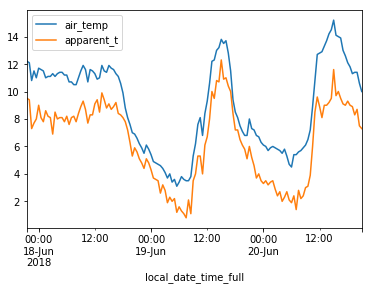

In [27]:
# Plotting is easy!
df[['air_temp', 'apparent_t']]
df[['air_temp', 'apparent_t']].plot()

# checkout what happened around the morning of the 19th!!

In [28]:
# Change frequency of you timestamped data
df.resample('4H').mean()

,aifstime_utc,lat,lon,apparent_t,cloud_base_m,cloud_oktas,cloud_type_id,delta_t,gust_kmh,gust_kt,...,press_qnh,press_msl,rain_trace,rel_hum,swell_height,swell_period,vis_km,wind_spd_kmh,wind_spd_kt,air_temp_f
local_date_time_full,,,,,,,,,,,,,,,,,,,,,
2018-06-17 20:00:00,2.018062e+13,-37.8,145.0,8.380000,-9999.0,-9999.0,-9999.0,1.240000,28.000000,15.000000,...,1021.6000,1021.6000,6.600,84.200000,-9999.0,-9999.0,10.0,15.400000,8.200000,52.7360
2018-06-18 00:00:00,2.018062e+13,-37.8,145.0,8.150000,-9999.0,-9999.0,-9999.0,1.562500,27.625000,14.875000,...,1022.6750,1022.6750,7.125,80.750000,-9999.0,-9999.0,10.0,14.250000,7.625000,52.3400
2018-06-18 04:00:00,2.018062e+13,-37.8,145.0,8.012500,-9999.0,-9999.0,-9999.0,2.312500,22.250000,12.000000,...,1024.1250,1024.1250,7.200,71.375000,-9999.0,-9999.0,10.0,11.250000,6.125000,51.8900
2018-06-18 08:00:00,2.018062e+13,-37.8,145.0,8.425000,-9999.0,-9999.0,-9999.0,2.287500,20.000000,10.750000,...,1026.4625,1026.4625,2.700,72.000000,-9999.0,-9999.0,10.0,10.750000,5.875000,52.3175
2018-06-18 12:00:00,2.018062e+13,-37.8,145.0,9.112500,-9999.0,-9999.0,-9999.0,1.725000,17.125000,9.250000,...,1026.3875,1026.3875,0.250,78.750000,-9999.0,-9999.0,10.0,9.750000,5.375000,52.6100
2018-06-18 16:00:00,2.018062e+13,-37.8,145.0,8.025000,-9999.0,-9999.0,-9999.0,1.937500,10.375000,5.500000,...,1027.2750,1027.2750,0.400,75.375000,-9999.0,-9999.0,10.0,4.625000,2.500000,49.7750
2018-06-18 20:00:00,2.018062e+13,-37.8,145.0,5.125000,-9999.0,-9999.0,-9999.0,0.300000,0.750000,0.375000,...,1028.2250,1028.2250,0.400,95.375000,-9999.0,-9999.0,10.0,0.500000,0.250000,43.2500
2018-06-19 00:00:00,2.018062e+13,-37.8,145.0,3.200000,-9999.0,-9999.0,-9999.0,0.000000,1.500000,0.750000,...,1028.2125,1028.2125,0.400,99.750000,-9999.0,-9999.0,10.0,0.750000,0.375000,40.2350
2018-06-19 04:00:00,2.018062e+13,-37.8,145.0,1.562500,-9999.0,-9999.0,-9999.0,0.000000,6.875000,3.750000,...,1028.7500,1028.7500,0.400,100.000000,-9999.0,-9999.0,10.0,3.125000,1.625000,38.3900


In [29]:
# Make it more granular, fill the gaps.
resampled = df.resample('15Min').ffill()
resampled[['air_temp', 'apparent_t']]

,air_temp,apparent_t
local_date_time_full,,
2018-06-17 21:30:00,12.2,9.5
2018-06-17 21:45:00,12.2,9.5
2018-06-17 22:00:00,12.1,9.4
2018-06-17 22:15:00,12.1,9.4
2018-06-17 22:30:00,10.8,7.3
2018-06-17 22:45:00,10.8,7.3
2018-06-17 23:00:00,11.5,7.7
2018-06-17 23:15:00,11.5,7.7
2018-06-17 23:30:00,11.0,8.0


In [30]:
# All your common stats methods are here.

print(df['air_temp'].mean())
df['air_temp'].describe()

8.960416666666665


count    144.000000
mean       8.960417
std        3.249104
min        3.100000
25%        5.900000
50%        9.950000
75%       11.500000
max       15.200000
Name: air_temp, dtype: float64

In [31]:
# run for each column.
df.describe()

,aifstime_utc,lat,lon,apparent_t,cloud_base_m,cloud_oktas,cloud_type_id,delta_t,gust_kmh,gust_kt,...,press_qnh,press_msl,rain_trace,rel_hum,swell_height,swell_period,vis_km,wind_spd_kmh,wind_spd_kt,air_temp_f
count,1.440000e+02,1.440000e+02,144.0,144.000000,144.0,144.0,144.0,144.000000,144.000000,144.000000,...,144.000000,144.000000,144.000000,144.000000,144.0,144.0,144.0,144.000000,144.000000,144.000000
mean,2.018062e+13,-3.780000e+01,145.0,6.406944,-9999.0,-9999.0,-9999.0,1.581250,14.027778,7.548611,...,1026.884722,1026.884722,1.311111,80.437500,-9999.0,-9999.0,10.0,8.152778,4.423611,48.128750
std,9.312328e+05,9.982320e-14,0.0,2.908191,0.0,0.0,0.0,1.291011,9.150600,4.910143,...,1.904552,1.904552,2.583301,14.141502,0.0,0.0,0.0,5.244137,2.827388,5.848386
min,2.018062e+13,-3.780000e+01,145.0,0.800000,-9999.0,-9999.0,-9999.0,0.000000,0.000000,0.000000,...,1021.000000,1021.000000,0.000000,51.000000,-9999.0,-9999.0,10.0,0.000000,0.000000,37.580000
25%,2.018062e+13,-3.780000e+01,145.0,3.500000,-9999.0,-9999.0,-9999.0,0.500000,7.000000,4.000000,...,1026.400000,1026.400000,0.000000,70.750000,-9999.0,-9999.0,10.0,5.500000,2.750000,42.620000
50%,2.018062e+13,-3.780000e+01,145.0,7.400000,-9999.0,-9999.0,-9999.0,1.350000,13.000000,7.000000,...,1027.150000,1027.150000,0.200000,83.000000,-9999.0,-9999.0,10.0,9.000000,5.000000,49.910000
75%,2.018062e+13,-3.780000e+01,145.0,8.825000,-9999.0,-9999.0,-9999.0,2.400000,20.000000,11.000000,...,1028.125000,1028.125000,0.400000,92.000000,-9999.0,-9999.0,10.0,11.000000,6.000000,52.700000
max,2.018062e+13,-3.780000e+01,145.0,12.300000,-9999.0,-9999.0,-9999.0,4.700000,35.000000,19.000000,...,1030.400000,1030.400000,7.200000,100.000000,-9999.0,-9999.0,10.0,20.000000,11.000000,59.360000


In [32]:
# Can ignore details of this code.
# Just look at the output.
# Creating larger dataset, with multiple cities.

# concat to stitch together.
import glob
data_files = glob.glob('ID[VTNQ]*2018*.axf')

mydata = []
for data_file in data_files:
    data = pd.read_csv(data_file, skiprows=19, skipfooter=2, parse_dates=['local_date_time_full[80]'])
    mydata.append(data)

# concatenate dataframes    
all_data = pd.concat(mydata, ignore_index=True)

# fix col names again.
all_data = all_data.rename(columns=fix_column_names)

# remove duplicates, overlapping times
all_data = all_data.drop_duplicates(['local_date_time_full', 'name'])

# Only since yesterday lunch time.
is_cold_morning = (
    (all_data['local_date_time_full'] >= '2018-06-10 00:00')
    & (all_data['local_date_time_full'] <= '2018-06-30 00:00')
)
all_data = all_data[is_cold_morning]


all_data = all_data.set_index(['local_date_time_full', 'name'])
all_data = all_data.sort_index()
all_data

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


sort_order    wmo  \
local_date_time_full name                                           
2018-06-17 11:30:00  Brisbane                          143  94576   
                     Canberra                          147  94926   
                     Hobart                            153  94970   
                     Melbourne (Olympic Park)          143  95936   
                     Sydney - Observatory Hill         143  94768   
2018-06-17 12:00:00  Brisbane                          143  94576   
                     Canberra                          147  94926   
                     Hobart                            152  94970   
                     Melbourne (Olympic Park)          142  95936   
                     Sydney - Observatory Hill         142  94768   
2018-06-17 12:02:00  Hobart                            151  94970   
2018-06-17 12:30:00  Brisbane                          142  94576   
                     Canberra                          146  94926   
                     Hobart                            150  94970   
                     Melbourne (Olympic Park)          141  95936   
                     Sydney - Observatory Hill         141  94768   
2018-06-17 12:45:00  Hobart                            149  94970   
2018-06-17 12:59:00  Canberra                          145  94926   
2018-06-17 13:00:00  Brisbane                          141  94576   
                     Canberra                          144  94926   
                     Hobart                            148  94970   
                     Melbourne (Olympic Park)          140  95936   
                     Sydney - Observatory Hill         140  94768   
2018-06-17 13:03:00  Hobart                            147  94970   
2018-06-17 13:30:00  Brisbane                          140  94576   
                     Canberra                          143  94926   
                     Hobart                            146  94970   
                     Melbourne (Olympic Park)          139  95936   
                     Sydney - Observatory Hill         139  94768   
2018-06-17 14:00:00  Brisbane                          139  94576   
...                                                    ...    ...   
2018-06-21 09:00:00  Brisbane                            0  94576   
                     Canberra                            0  94926   
                     Hobart                              5  94970   
                     Melbourne (Olympic Park)            5  95936   
                     Sydney - Observatory Hill           0  94768   
2018-06-21 09:30:00  Brisbane                            4  94576   
                     Canberra                            4  94926   
                     Hobart                              4  94970   
                     Melbourne (Olympic Park)            4  95936   
                     Sydney - Observatory Hill           4  94768   
2018-06-21 10:00:00  Brisbane                            3  94576   
                     Canberra                            3  94926   
                     Hobart                              3  94970   
                     Melbourne (Olympic Park)            3  95936   
                     Sydney - Observatory Hill           3  94768   
2018-06-21 10:30:00  Brisbane                            2  94576   
                     Canberra                            2  94926   
                     Hobart                              2  94970   
                     Melbourne (Olympic Park)            2  95936   
                     Sydney - Observatory Hill           2  94768   
2018-06-21 11:00:00  Brisbane                            1  94576   
                     Canberra                            1  94926   
                     Hobart                              1  94970   
                     Melbourne (Olympic Park)            1  95936   
                     Sydney - Observatory Hill           1  94768   
2018-06-21 11:30:00  Brisbane                 

In [33]:
all_data
# stack/unstack

sort_order    wmo  \
local_date_time_full name                                           
2018-06-17 11:30:00  Brisbane                          143  94576   
                     Canberra                          147  94926   
                     Hobart                            153  94970   
                     Melbourne (Olympic Park)          143  95936   
                     Sydney - Observatory Hill         143  94768   
2018-06-17 12:00:00  Brisbane                          143  94576   
                     Canberra                          147  94926   
                     Hobart                            152  94970   
                     Melbourne (Olympic Park)          142  95936   
                     Sydney - Observatory Hill         142  94768   
2018-06-17 12:02:00  Hobart                            151  94970   
2018-06-17 12:30:00  Brisbane                          142  94576   
                     Canberra                          146  94926   
                     Hobart                            150  94970   
                     Melbourne (Olympic Park)          141  95936   
                     Sydney - Observatory Hill         141  94768   
2018-06-17 12:45:00  Hobart                            149  94970   
2018-06-17 12:59:00  Canberra                          145  94926   
2018-06-17 13:00:00  Brisbane                          141  94576   
                     Canberra                          144  94926   
                     Hobart                            148  94970   
                     Melbourne (Olympic Park)          140  95936   
                     Sydney - Observatory Hill         140  94768   
2018-06-17 13:03:00  Hobart                            147  94970   
2018-06-17 13:30:00  Brisbane                          140  94576   
                     Canberra                          143  94926   
                     Hobart                            146  94970   
                     Melbourne (Olympic Park)          139  95936   
                     Sydney - Observatory Hill         139  94768   
2018-06-17 14:00:00  Brisbane                          139  94576   
...                                                    ...    ...   
2018-06-21 09:00:00  Brisbane                            0  94576   
                     Canberra                            0  94926   
                     Hobart                              5  94970   
                     Melbourne (Olympic Park)            5  95936   
                     Sydney - Observatory Hill           0  94768   
2018-06-21 09:30:00  Brisbane                            4  94576   
                     Canberra                            4  94926   
                     Hobart                              4  94970   
                     Melbourne (Olympic Park)            4  95936   
                     Sydney - Observatory Hill           4  94768   
2018-06-21 10:00:00  Brisbane                            3  94576   
                     Canberra                            3  94926   
                     Hobart                              3  94970   
                     Melbourne (Olympic Park)            3  95936   
                     Sydney - Observatory Hill           3  94768   
2018-06-21 10:30:00  Brisbane                            2  94576   
                     Canberra                            2  94926   
                     Hobart                              2  94970   
                     Melbourne (Olympic Park)            2  95936   
                     Sydney - Observatory Hill           2  94768   
2018-06-21 11:00:00  Brisbane                            1  94576   
                     Canberra                            1  94926   
                     Hobart                              1  94970   
                     Melbourne (Olympic Park)            1  95936   
                     Sydney - Observatory Hill           1  94768   
2018-06-21 11:30:00  Brisbane                 

In [34]:
# Stack & Unstack

# unstack, take from index, make column.

# stack, take columns, make an index.

all_data.unstack(level='name')

sort_order                                           \
name                   Brisbane Canberra Hobart Melbourne (Olympic Park)   
local_date_time_full                                                       
2018-06-17 11:30:00       143.0    147.0  153.0                    143.0   
2018-06-17 12:00:00       143.0    147.0  152.0                    142.0   
2018-06-17 12:02:00         NaN      NaN  151.0                      NaN   
2018-06-17 12:30:00       142.0    146.0  150.0                    141.0   
2018-06-17 12:45:00         NaN      NaN  149.0                      NaN   
2018-06-17 12:59:00         NaN    145.0    NaN                      NaN   
2018-06-17 13:00:00       141.0    144.0  148.0                    140.0   
2018-06-17 13:03:00         NaN      NaN  147.0                      NaN   
2018-06-17 13:30:00       140.0    143.0  146.0                    139.0   
2018-06-17 14:00:00       139.0    142.0  145.0                    138.0   
2018-06-17 14:07:00         NaN      NaN  144.0                      NaN   
2018-06-17 14:30:00       138.0    141.0  143.0                    137.0   
2018-06-17 15:00:00       137.0    140.0  142.0                    136.0   
2018-06-17 15:01:00         NaN      NaN  141.0                      NaN   
2018-06-17 15:30:00       136.0    139.0  140.0                    135.0   
2018-06-17 16:00:00       135.0    138.0  139.0                    134.0   
2018-06-17 16:10:00         NaN      NaN  138.0                      NaN   
2018-06-17 16:30:00       134.0    137.0  137.0                    133.0   
2018-06-17 16:49:00         NaN      NaN  136.0                      NaN   
2018-06-17 17:00:00       133.0    147.0  135.0                    132.0   
2018-06-17 17:30:00       132.0    146.0  134.0                    131.0   
2018-06-17 17:49:00         NaN      NaN  133.0                      NaN   
2018-06-17 18:00:00       131.0    145.0  132.0                    130.0   
2018-06-17 18:30:00       130.0    144.0  131.0                    129.0   
2018-06-17 18:58:00         NaN      NaN  130.0                      NaN   
2018-06-17 19:00:00       129.0    143.0  129.0                    128.0   
2018-06-17 19:30:00       128.0    142.0  128.0                    127.0   
2018-06-17 19:32:00         NaN      NaN  127.0                      NaN   
2018-06-17 20:00:00       127.0    141.0  126.0                    126.0   
2018-06-17 20:30:00       126.0    140.0  125.0                    125.0   
...                         ...      ...    ...                      ...   
2018-06-20 21:00:00        24.0     24.0    0.0                     29.0   
2018-06-20 21:30:00        23.0     23.0   28.0                     28.0   
2018-06-20 22:00:00        22.0     22.0   27.0                     27.0   
2018-06-20 22:30:00        21.0     21.0   26.0                     26.0   
2018-06-20 23:00:00        20.0     20.0   25.0                     25.0   
2018-06-20 23:30:00        19.0     19.0   24.0                     24.0   
2018-06-21 00:00:00        18.0     18.0   23.0                     23.0   
2018-06-21 00:30:00        17.0     17.0   22.0                     22.0   
2018-06-21 01:00:00        16.0     16.0   21.0                     21.0   
2018-06-21 01:30:00        15.0     15.0   20.0                     20.0   
2018-06-21 02:00:00        14.0     14.0   19.0                     19.0   
2018-06-21 02:30:00        13.0     13.0   18.0                     18.0   
2018-06-21 03:00:00        12.0     12.0   17.0                     17.0   
2018-06-21 03:30:00        11.0     11.0   16.0                     16.0   
2018-06-21 04:00:00        10.0     10.0   15.0                     15.0   
2018-06-21 04:30:00         9.0      9.0   14.0                     14.0   
2018-06-21 05:00:00         8.0      8.0   13.0                     13.0   
2018-06-21 05:30:00         7.0      7.0   12.0                     12.0   
2018-06-21 06:00:00         6.0      6.0   11.0                     1

In [35]:
# Might be useful when storing your data in DB/etc??

stacked = all_data.stack()
stacked = stacked.reset_index()
stacked.columns = ['time', 'place', 'metric', 'value']
stacked


,time,place,metric,value
0,2018-06-17 11:30:00,Brisbane,sort_order,143
1,2018-06-17 11:30:00,Brisbane,wmo,94576
2,2018-06-17 11:30:00,Brisbane,history_product,IDQ60901
3,2018-06-17 11:30:00,Brisbane,local_date_time,17/11:30am
4,2018-06-17 11:30:00,Brisbane,aifstime_utc,20180617013000
5,2018-06-17 11:30:00,Brisbane,lat,-27.5
6,2018-06-17 11:30:00,Brisbane,lon,153
7,2018-06-17 11:30:00,Brisbane,apparent_t,12.8
8,2018-06-17 11:30:00,Brisbane,cloud,-
9,2018-06-17 11:30:00,Brisbane,cloud_base_m,-9999


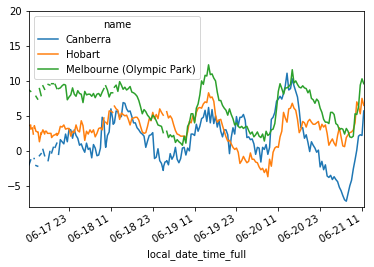

In [60]:
# Melb vs others weather, this time of year.
places = [
    'Melbourne (Olympic Park)',
    'Hobart',
    'Canberra',
]
#places_data = all_data.loc[pd.IndexSlice[:, places], :]
places_data = all_data.loc[all_data.index.get_level_values(1).isin(places)]

places_data['apparent_t'].unstack().plot(ylim=(-8, 20))

In [50]:
all_data.reset_index().groupby('name')['air_temp'].min()

name
Brisbane                     8.8
Canberra                    -3.4
Hobart                       2.9
Melbourne (Olympic Park)     3.1
Sydney - Observatory Hill    9.0
Name: air_temp, dtype: float64

# A man is not a camel
![A Man is not a camel](pics/camel.jpg)

# nowtapped.com
![nowtapped.com](pics/tapped.png)

In [ ]:
venues = pd.read_csv('Beer/venues.csv')
venues

In [ ]:
# The nearest watering hole is???

our_lat, our_long = -27.476441, 153.018234

# Good ol' Pythagoras
venues['dist'] = np.sqrt(
                    (our_lat - venues['lat'])**2
                    +
                    (our_long - venues['lng'])**2
                )
venues = venues.sort(['dist'])
venues[['name', 'dist', 'street_address', 'city']]

![Can I have some of your tasty beverage?](pics/pulp.gif)

In [ ]:
# You drink a beer, and checkin four-square style, give a beer rating.

checkins = pd.read_csv('Beer/checkins.csv', parse_dates=['created_at'])
checkins

# venue_id, but not venue information ;(

In [ ]:
# Fast SQL style JOINs.

beer_data = pd.merge(checkins, venues, on='venue_id', how='inner')
beer_data

In [ ]:
# Most popular beers?

# value_counts does frequency counting for you ;)

print beer_data['beer'].value_counts().iloc[:10]

# percent of checkins
beer_data['beer'].value_counts(normalize=True).iloc[:10] * 100.0

# Group By!

* split
* apply:
    * aggregate
    * transform
    * filter
* combine

* Killer feature!
* Very, Very flexible!

In [ ]:
# Who has the most beers?

# BTW: working on making this 10-20x faster
# https://github.com/pydata/pandas/issues/7771
uniques = lambda x: x.nunique()

num_beers = beer_data.groupby('name')['beer'].agg({'num_beers': uniques})
num_beers.sort('num_beers', ascending=False)

# SQL-Style
# SELECT name, COUNT DISTINCT beer AS num_beers
# FROM beer_data
# GROUP BY name
# ORDER BY num_beers

In [ ]:
beer_data.groupby('city').size()

# SQL
# SELECT city, COUNT(*)

In [ ]:
# How many beers, drunk by city & beer.

beer_data.groupby(['city', 'beer']).size()

# Straw Poll?

## Who likes Beer?

## Who likes Chocolate?

## Who like Chocolate Beer (with Vanilla beans)?

![Temptress](pics/h_temptress.jpg)

In [ ]:
# Where can I get one??

is_delicious = beer_data['beer'].str.contains('Temptress')
# str for fast (cython) vectorized string operations.

temptress_data = beer_data[is_delicious]

temptress_data = temptress_data.sort('created_at', ascending=False)

temptress_data[['name', 'beer', 'dist', 'venue_name', 'created_at', 'checkin_comment']]

In [ ]:
# If there's time.

# pivot tables, Excel-style

piv = beer_data.pivot_table(index='beer', columns='name',
                    values='rating', aggfunc=np.mean,
                    fill_value=0)

piv

# To Learn more:

## Docs are good.

## O'Reilly book is excellent, written by author of Pandas

![Pandas book](pics/book.jpg)

# Notes for R Users.

[My R/Pandas notes](https://github.com/lexual/sphinx-notes/blob/master/source/tech/r_numpy_pandas_cookbook.rst)
    
[Sphinx view of the same](http://notes.lexual.com/tech/r_numpy_pandas_cookbook.html)

[Pandas docs comparing with R](http://pandas.pydata.org/pandas-docs/stable/comparison_with_r.html)

[Pandas docs comparing with SQL](http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html)

# Questions??


### (Also we're hiring, come speak to me)